# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
# Выгрузка данных: 
telecom_data = pd.read_csv('telecom_users.csv', index_col=0)
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [6]:
# Проверим на пропуски: 
telecom_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Предобработка данных и feature-engineering: 

In [8]:
# Удалим столбец customerID за ненадобностью: 
telecom_data = telecom_data.drop(columns=['customerID'])

# Преобразование всех данных в категориальные: 
telecom_data.loc[:, 'gender'] = telecom_data.loc[:, 'gender'].map({'Female': 1, 'Male': 0})

for feature in telecom_data.columns:
    # Для всех столбцов только с ['Yes', 'No']: 
    if set(telecom_data.loc[:, feature].unique()) == set(['Yes', 'No']): 
        telecom_data.loc[:, feature] = telecom_data.loc[:, feature].map({'Yes': 1, 'No': 0})
    # Для всех столбцов только с ['Yes', 'No', 'No internet service']: 
    if set(telecom_data.loc[:, feature].unique()) == set(['Yes', 'No', 'No internet service']): 
        telecom_data.loc[:, feature] = telecom_data.loc[:, feature].map({'No internet service': 0, 'Yes': 1, 'No': 2})

# Разделение tenure по 4 квантилям: 
telecom_data['tenure'] = pd.qcut(x=telecom_data['tenure'], q=4, labels=range(4)).astype(int)

telecom_data['MultipleLines'] = telecom_data['MultipleLines'].map({'No phone service': 0, 'Yes': 1, 'No': 2})
telecom_data['InternetService'] = telecom_data['InternetService'].map({'No': 0, 'Fiber optic': 1, 'DSL': 2})
telecom_data['Contract'] = telecom_data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
telecom_data['PaymentMethod'] = telecom_data['PaymentMethod'].map(
    {'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
    )

# Сегментация клиентов по ежемесячным оплатам + за все время: 
telecom_data['MonthlyCharges'] = pd.cut(x=telecom_data['MonthlyCharges'], bins=5, labels=range(5)).astype(int)
telecom_data[telecom_data['TotalCharges'] == ' '] = 0 # Пропуски в виде ' ' в  TotalCharges
telecom_data['TotalCharges'] = pd.cut(x=telecom_data['TotalCharges'].astype(float), bins=5, labels=range(5)).astype(int)

Все подключенные услуги можно использовать в новой фиче "Количество подключенных услуг" - ServicesNum

In [9]:
# Все возможные дополнительные сервисы для клиента: 
av_services = {
    num: column for num, column in enumerate(telecom_data.columns) 
    if column in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    }

# Считаем, сколько на каждую строчку (клиента) приходится подключенных дополнительных услуг: 
NumOfConnnectedServices = telecom_data.apply(lambda x: len([1 for num, element in enumerate(x) if ((element==1) & (num in av_services.keys()))]), axis=1)

# Заменяем текущие признаки итоговым NumOfConnnectedServices: 
telecom_data['ServicesNum'] = NumOfConnnectedServices
telecom_data.drop(columns=['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], inplace=True)

In [10]:
# Посмотрим на нынешнее состояние датасета: 
telecom_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServicesNum
1869,0,0,1,1,3,1,0,2,0,0,0,0,0,1
4528,1,0,0,0,2,1,1,0,1,0,3,2,0,3
6344,1,1,1,0,2,1,1,0,1,1,2,1,1,1


In [11]:
# Проверим, остались ли некорректные и неподходящие для моделей значения: 
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            5986 non-null   int64
 1   SeniorCitizen     5986 non-null   int64
 2   Partner           5986 non-null   int64
 3   Dependents        5986 non-null   int64
 4   tenure            5986 non-null   int32
 5   PhoneService      5986 non-null   int64
 6   InternetService   5986 non-null   int64
 7   Contract          5986 non-null   int64
 8   PaperlessBilling  5986 non-null   int64
 9   PaymentMethod     5986 non-null   int64
 10  MonthlyCharges    5986 non-null   int32
 11  TotalCharges      5986 non-null   int32
 12  Churn             5986 non-null   int64
 13  ServicesNum       5986 non-null   int64
dtypes: int32(3), int64(11)
memory usage: 631.3 KB


Видим, что для всех переменных значения приняли подходящие для моделей форматы. Можем двигаться дальше.   

# 2. Исследование зависимостей и формулирование гипотез

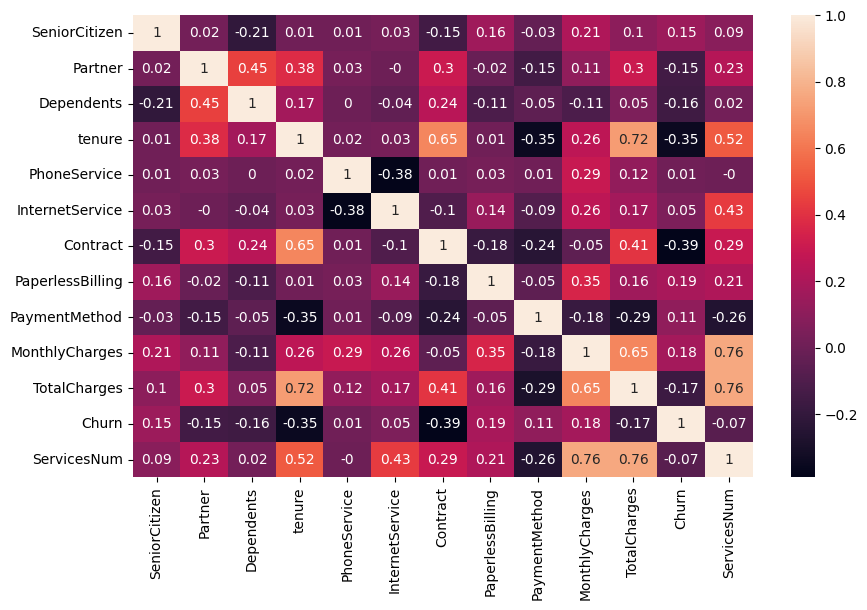

In [20]:
# Построим корреляционную матрицу и рассмотрим наиболее коррелирующие с целевой переменной признаки: 
plt.figure(figsize=(10, 6))
ax = sns.heatmap(round(telecom_data.corr(), 2), annot=True)

In [13]:
# Переменная gender не коррелирует ни с какими признаками, удаление:  
telecom_data.drop(columns=['gender'], inplace=True)

Рассмотрим переменную PhoneService и визуализируем данные по этому признаку: 

In [53]:
plt.style.use('Solarize_Light2')

In [60]:
# fig, ax = plt.subplots(figsize=(7, 7))

# ax.set_title('Соотношение кол-ва клиентов компании')

arr = [len(telecom_data[telecom_data['PhoneService']==1])/len(telecom_data), 
        len(telecom_data[telecom_data['PhoneService']==0])/len(telecom_data)]

df = pd.DataFrame(      
        data=arr, 
        index=[0, 1],
        columns=['% с услугой телеф. связи']
)
df['% клиентов пенсионного возраста'] = [
        0,
        0
]

df
# ax.pie(arr, startangle=0)

# ax.legend(labels=['С подключенной услугой телеф. связи', 'Без подключенной услуги телеф. связи'])

,% с услугой телеф. связи
0,0.9001
1,0.0999


In [ ]:
str(round(len(telecom_data[telecom_data['PhoneService']==1]) / len(telecom_data) * 100, 2)) + ' %'

'90.01 %'

Посчитаем отношение кол-ва клиентов моложе пенсионного возраста к общему кол-ву клиентов, не пользующихся услугами телефонной связи: 

In [61]:
str(round(len(telecom_data[(telecom_data['PhoneService']==0) & (telecom_data['SeniorCitizen']==0)]) / len(telecom_data[(telecom_data['PhoneService']==0)])*100, 2)) + ' %'

'85.12 %'

Видим, что к данной категории людей относятся 85% клиентов компании. У многих из них подключено большое кол-во доп. услуг и оператора, то есть они относятся к категории активных клиентов.  
Из этого, а также из результатов корр. матрицы следует, что признак `PhoneService` можно исключить из рассмотрения, а целевая переменная оттока не связана с наличием подключения у клиента услуги телефонной связи (что, казалось бы, изначально не слишком очевидно даже из основного предназначения телеком-компании - предоставление услуг связи). 

In [62]:
telecom_data.drop(columns=['PhoneService'], inplace=True)

## Ключевые гипотезы: 
Наиболее сильно отток клиентов зависит от таких характеристик, как:  
* `tenure` – сколько месяцев человек являлся клиентом компании
* `Contract` – тип контракта клиента (Month-to-month, One year, Two year)  

Эти гипотезы, обоснованные математически, также являются наиболее логичными, поскольку, например, оформление долгосрочного контракта с телеком-оператором подразумевает, что клиента устраивают условия, и он готов пользоваться услугами оператора длительный срок. Те же самые следствия, если его контракт уже длится продолжительное время. 

# 3. Построение моделей для прогнозирования оттока

In [63]:
### YOUR CODE HERE ###




# 4. Сравнение качества моделей 

In [64]:
### YOUR CODE HERE ###


